In [51]:
from collections import Counter
import scanpy.api  as sc
import numpy as np
import pandas as pd
import anndata

In [52]:

f = sc.read("/home/mt/Downloads/Chimp/summary/Chimp_S2_L001_umi_expression_matrix.tsv").transpose()
g = sc.read("/home/mt/Downloads/Chimp/summary/Chimp_S2_L002_umi_expression_matrix.tsv").transpose()
c = f.concatenate(g,index_unique=None)

len(c.obs_names)
len(set(c.obs_names))

cc = Counter(c.obs_names)
cc.most_common(10)



Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


[('AAGACAAGGAAG', 2),
 ('CTCTCTCCGTAA', 2),
 ('TACGAACACAAG', 2),
 ('CTCACGTTGTCC', 2),
 ('GATTCGCTCCCT', 2),
 ('ATGCGATCTACT', 2),
 ('TCGTGAAATACA', 2),
 ('ATGGGAGTGAGC', 2),
 ('GGGTCTCGTTAA', 2),
 ('ATTTTCGTTCTG', 2)]

In [53]:
cc.most_common(10)

[('AAGACAAGGAAG', 2),
 ('CTCTCTCCGTAA', 2),
 ('TACGAACACAAG', 2),
 ('CTCACGTTGTCC', 2),
 ('GATTCGCTCCCT', 2),
 ('ATGCGATCTACT', 2),
 ('TCGTGAAATACA', 2),
 ('ATGGGAGTGAGC', 2),
 ('GGGTCTCGTTAA', 2),
 ('ATTTTCGTTCTG', 2)]

In [54]:
X=[]
for u in set(c.obs_names):
    X.append(c.X[c.obs_names==u,:].sum(axis=0))
X=np.array(X)

In [174]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [175]:
sc.pp.filter_cells(adata, min_genes=30)
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)

(4763, 8082)


In [176]:
mito_genes = [name for name in adata.var_names if name.startswith('MT-')]
ribo_genes = [name for name in adata.var_names if name.startswith('RPS') or name.startswith('RPL') ]

# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
adata.obs['percent_ribo'] = np.sum(
    adata[:, ribo_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [177]:
adata.obs

,n_genes,percent_mito,percent_ribo,n_counts
CACCCAGATCTA,42,0.0,0.0,66.0
CCGGTGCTGCGT,190,0.0,0.0,377.0
GGACTACTTACT,37,0.0,0.0,60.0
TACATTCAGGAG,31,0.0,0.0,64.0
TCTTTTCCAGGA,53,0.0,0.0,114.0
GTACGTGCCACC,52,0.0,0.0,91.0
ATTTGTGGTGAT,38,0.0,0.0,64.0
TGTTTATACAAT,54,0.0,0.0,93.0
GCGGACGTCTGT,37,0.0,0.0,56.0
TGGGCCGTTTCC,30,0.0,0.0,63.0


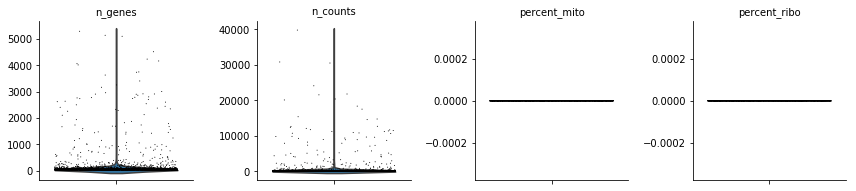

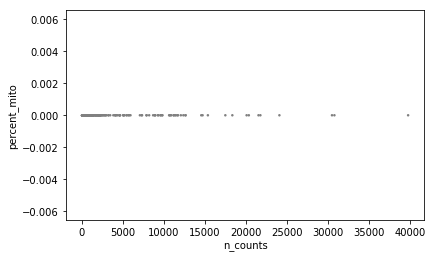

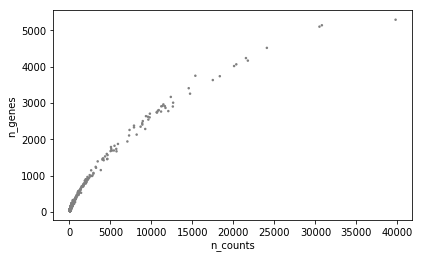

In [178]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

39.779
[4.59965386 4.48842379 4.48422864 ... 1.60205999 1.60205999 1.60205999]
(array([3208, 3711, 4612, 5296, 6484, 7378, 8748, 9419, 9846]),)
1


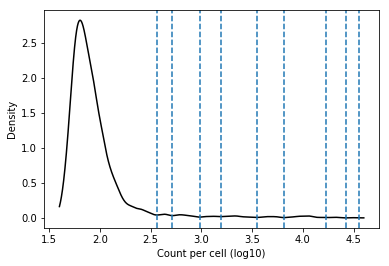

In [179]:
from umi_tools import umi_methods
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
cell_barcode_counts=Counter(adata.obs.n_counts.to_dict())
#d=umi_tools.umi_methods.getKneeEstimate(Counter(adata.obs.n_counts.to_dict()),expect_cells=15000,plotfile_prefix='KneeOrganoid')

import matplotlib.lines as mlines
from functools import partial
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
import umi_tools.Utilities as U

threshold = 0.001 * cell_barcode_counts.most_common(1)[0][1]

counts = sorted(cell_barcode_counts.values(), reverse=True)
counts_thresh = [x for x in counts if x > threshold]
log_counts = np.log10(counts_thresh)
print(threshold)
print(log_counts)
density = gaussian_kde(log_counts, bw_method=0.1)

xx_values = 10000  # how many x values for density plot
xx = np.linspace(log_counts.min(), log_counts.max(), xx_values)

local_min = None
local_mins = argrelextrema(density(xx), np.less)
print(local_mins)
print(len(local_mins))
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(xx, density(xx), 'k')
fig1.set_xlabel("Count per cell (log10)")
fig1.set_ylabel("Density")
for pos in xx[local_mins]:
    fig1.axvline(x=pos, ls="dashed")

In [180]:
adata.raw = adata

In [181]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')

In [182]:
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat

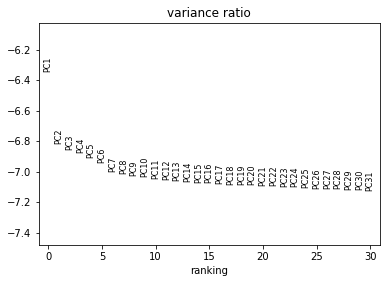

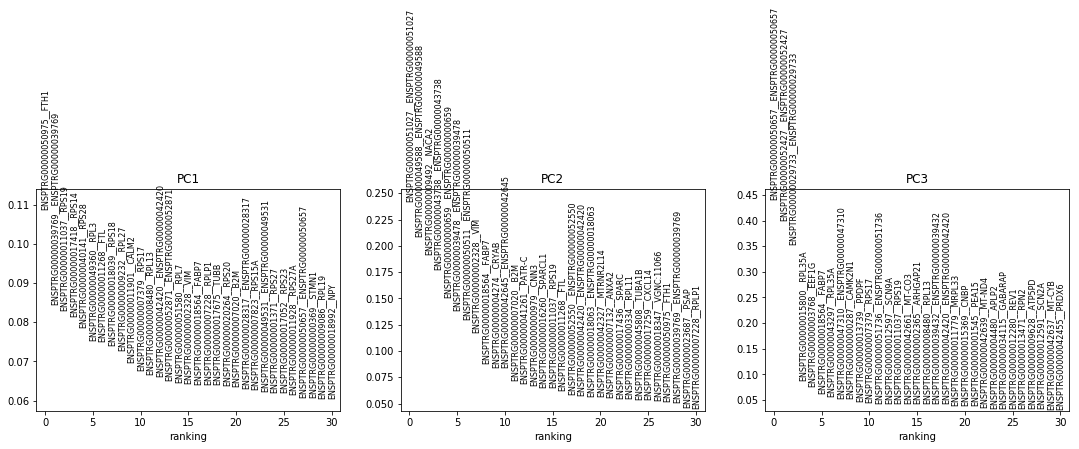

In [183]:
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.pca_loadings(adata)

In [ ]:
sc.tl.tsne(adata, random_state=2, n_pcs=50)
sc.pl.tsne(adata, color=['n_counts','percent_ribo','percent_mito'])

In [ ]:
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts'])

In [ ]:
sc.tl.rank_genes_groups(adata, 'louvain')
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(20)

In [169]:
adata = anndata.AnnData(X= X,var = pd.DataFrame(index=c.var_names),obs=pd.DataFrame(index=list(set(c.obs_names))))

In [170]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)

(417, 6718)


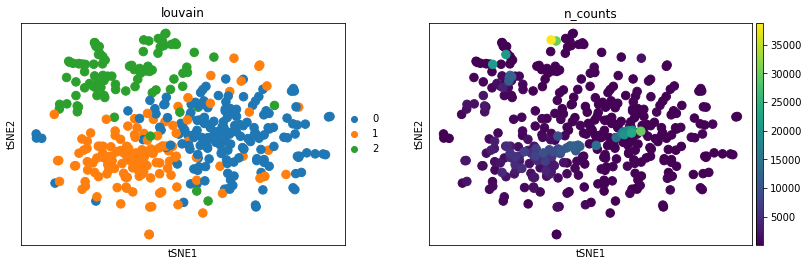

In [171]:
sc.pp.normalize_per_cell(adata,counts_per_cell=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.pp.regress_out(adata,'n_counts')
sc.tl.pca(adata)
adata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
sc.tl.tsne(adata)
sc.pp.neighbors(adata)
sc.tl.louvain(adata)
sc.pl.tsne(adata,color=['louvain','n_counts'])

saving figure to file ./figures/rank_genes_groups_louvain.pdf


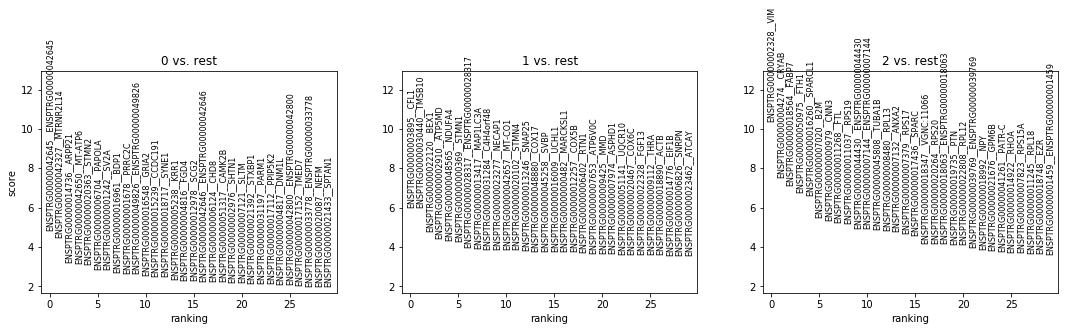

,0,1,2
0,ENSPTRG00000042645__ENSPTRG00000042645,ENSPTRG00000003895__CFL1,ENSPTRG00000002328__VIM
1,ENSPTRG00000042327__MTRNR2L14,ENSPTRG00000030440__TMSB10,ENSPTRG00000004274__CRYAB
2,ENSPTRG00000014736__ARPP21,ENSPTRG00000022120__BEX1,ENSPTRG00000018564__FABP7
3,ENSPTRG00000042650__MT-ATP6,ENSPTRG00000002910__ATP5MD,ENSPTRG00000050975__FTH1
4,ENSPTRG00000020363__STMN2,ENSPTRG00000048565__NDUFA4,ENSPTRG00000016260__SPARCL1
5,ENSPTRG00000006704__PAPOLA,ENSPTRG00000000369__STMN1,ENSPTRG00000007020__B2M
6,ENSPTRG00000001242__SV2A,ENSPTRG00000028317__ENSPTRG00000028317,ENSPTRG00000000979__CNN3
7,ENSPTRG00000016961__BDP1,ENSPTRG00000013417__MAP1LC3A,ENSPTRG00000011268__FTL
8,ENSPTRG00000001678__PRRC2C,ENSPTRG00000031284__C4H4orf48,ENSPTRG00000011037__RPS19
9,ENSPTRG00000049826__ENSPTRG00000049826,ENSPTRG00000023277__NECAP1,ENSPTRG00000044430__ENSPTRG00000044430


In [172]:
sc.tl.rank_genes_groups(adata, groupby='louvain',use_raw=True)
sc.pl.rank_genes_groups(adata, n_genes=30, save='.pdf')
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)


In [173]:
adata

AnnData object with n_obs × n_vars = 417 × 6718 
    obs: 'n_genes', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'